<a href="https://colab.research.google.com/github/VictorGabrielCuralesvic/email-antispam-project/blob/main/email_spam_detector_naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
def plot_confusion_matrix_heatmap(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Matriz de Confusão')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Valores Reais')
    plt.show()

In [42]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [69]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [45]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [46]:
df.sample(5)

,v1,v2
3537,ham,We are pleased to inform that your application...
4094,ham,I ain't answerin no phone at what is actually ...
1422,spam,Congratulations ur awarded either å£500 of CD ...
58,ham,Tell where you reached
3699,ham,Oh...i asked for fun. Haha...take care. Ì_


In [47]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1494,ham,It has everything to do with the weather. Keep...
240,ham,Tomarrow final hearing on my laptop case so i ...
2355,ham,"Hello, my love ! How went your day ? Are you a..."
2517,ham,"Sorry, I'll call later"
1369,ham,Did you try making another butt.


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [50]:
vectorize = TfidfVectorizer()

In [51]:
X_train_tfidf = vectorize.fit_transform(X_train)

In [52]:
X_test_tfidf = vectorize.transform(X_test)

In [53]:
alphas = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

In [54]:
cv_scores = []

In [55]:
for alpha in alphas:
  nb_classifier = MultinomialNB(alpha=alpha)
  scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
  cv_scores.append(scores.mean())

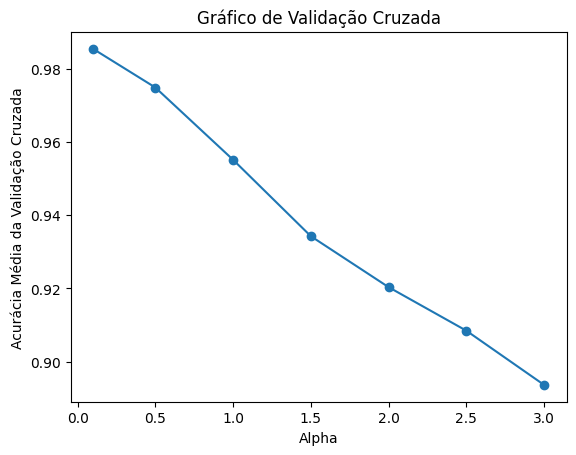

In [56]:
plt.plot(alphas, cv_scores, marker='o')
plt.title('Gráfico de Validação Cruzada')
plt.xlabel('Alpha')
plt.ylabel('Acurácia Média da Validação Cruzada')
plt.show()

In [57]:
best_alpha = alphas[cv_scores.index(max(cv_scores))]

In [58]:
print(f'melhor Alpha: {best_alpha}')

melhor Alpha: 0.1


In [59]:
final_nb_classifier = MultinomialNB(alpha=best_alpha)
final_nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.1)

In [60]:
y_pred_tfidf = final_nb_classifier.predict(X_test_tfidf)

In [61]:
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

In [62]:
print(f'Acurácia: {accuracy_tfidf:.2f}')

Acurácia: 0.98


In [63]:
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print('\nMatriz de Confusão: ')
print(conf_matrix_tfidf)


Matriz de Confusão: 
[[964   1]
 [ 19 131]]


In [64]:
class_report_tfidf = classification_report(y_test, y_pred_tfidf)
print('\nRelatório de Classificação: ')
print(class_report_tfidf)


Relatório de Classificação: 
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [65]:
!pip install --upgrade scikit-learn

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

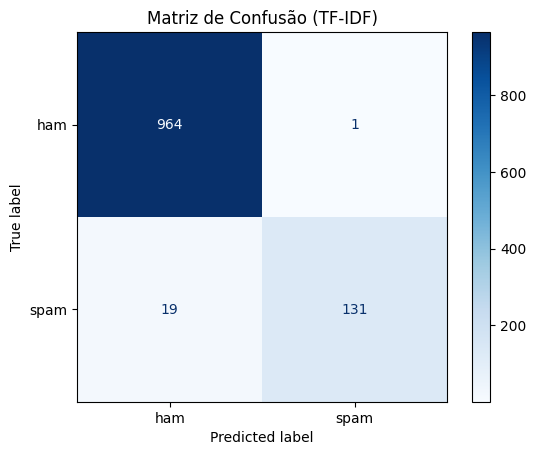

In [67]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tfidf, display_labels=['ham', 'spam'])
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusão (TF-IDF)')
plt.show()

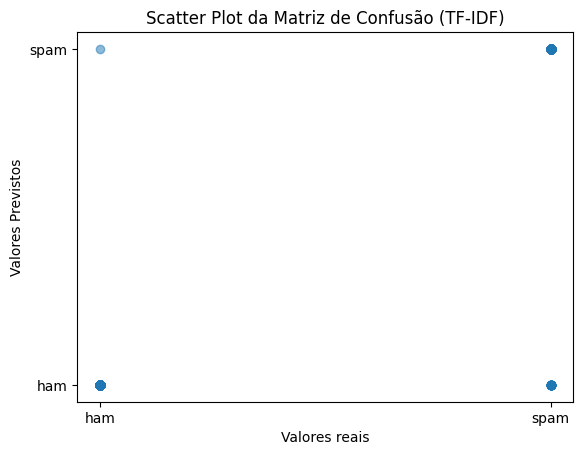

In [68]:
plt.scatter(y_test, y_pred_tfidf, alpha=0.5)
plt.title('Scatter Plot da Matriz de Confusão (TF-IDF)')
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.show()